In [1]:
%matplotlib notebook

import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

In [2]:
# In Class 1:

In [3]:
# 1.
# a)

# Number of time steps

Nstep = 200

# Array to store the position, velocity and acceleration of a particle in
# three dimensions

x = np.zeros((Nstep, 3))
v = np.zeros((Nstep, 3))
a = np.zeros((Nstep, 3))

x[0] = [1,0,0]
v[0] = [0,1,0.1]
a[0] = [-1,0,0]

dt = 0.1

In [4]:
# b)

# Initialising time
time = 0

for i in range(Nstep-1):
    time += dt
    
    a_t_p_dt = [-np.cos(time), -np.sin(time), 0]
    a[i+1] = a_t_p_dt
    
    x_t_p_dt = x[i] + dt*v[i] + (dt**2)*(a[i]/2) 
    x[i+1] = x_t_p_dt
    
    v_t_p_dt = x[i] + dt*((a[i] + a[i+1])/2)
    v[i+1] = v_t_p_dt

In [5]:
# c)

fig = plt.figure()
ax = fig.add_subplot(111,projection='3d')

x_pos = x[:,0]
y_pos = x[:,1]
z_pos = x[:,2]

ax.plot(x_pos, y_pos, z_pos)
plt.show()

<IPython.core.display.Javascript object>

In [6]:
# 2.
# a)

L = 10 # Side length of box

# Same as Q1.a setup

Nstep = 200

r = np.zeros((Nstep, 3))
v = np.zeros((Nstep, 3))
a = np.zeros((Nstep, 3))

r[0] = L*np.random.rand(3)
v[0] = np.random.rand(3)
a[0] = [0,0,0]

In [7]:
# b)

# Same as Q1.b setup

time = 0

for i in range(Nstep-1):
    time += dt
    
    a_t_p_dt = [-np.cos(time), -np.sin(time), 0]
    a[i+1] = a_t_p_dt
    
    r_t_p_dt = r[i] + dt*v[i] + (dt**2)*(a[i]/2) 
    r[i+1] = r_t_p_dt
    
    v_t_p_dt = r[i] + dt*((a[i] + a[i+1])/2)
    v[i+1] = v_t_p_dt

# Same as Q1.c setup
    
fig = plt.figure()
ax = fig.add_subplot(111,projection='3d')

x_pos = r[:,0]
y_pos = r[:,1]
z_pos = r[:,2]

ax.scatter(x_pos, y_pos, z_pos)
plt.show()

<IPython.core.display.Javascript object>

In [8]:
# c)

In [9]:
# In Class 2

In [10]:
# 1)

def lennard_jones_energy(position, Npart, sigma, epsilon):
    """
    A function to calculate the Lennard-Jones potential energy for a set of 𝑁𝑃𝑎𝑟𝑡
    particles
    
    Input:
    position = the position of the particles in three dimensions
    Npart = number of particles
    sigma = constant
    epsilon = constant
    
    Output:
    Etot = the Lennard-Jones potential energy for a set of Npart particles
    """
    Etot = 0
    
    for i in range(Npart-1):
        for j in range(i+1,Npart):
            
            rij = r[j,:] - r[i,:]
            r_ij_mag_sqrd = np.sum(rij*rij)
            r_ij_mag = np.sqrt(r_ij_mag_sqrd)
            
            # Lennard-Jones potential formula
            V_rij = 4*epsilon*((sigma/r_ij_mag)**12 - (sigma/r_ij_mag)**6)
            
            Etot = Etot + V_rij
    
    return Etot

In [11]:
# 2)

def lennard_jones_force(position, Npart, sigma, epsilon):
    """
    A function to calculate the Lennard-Jones forse for a set of Npart
    particles
    
    Input:
    position = the position of the particles in three dimensions
    Npart = number of particles
    sigma = constant
    epsilon = constant
    
    Output:
    Ftot = the Lennard-Jones total force for a set of Npart particles
    """
    Ftot = np.zeros((Npart, 3))
    
    r = position
    
    for i in range(Npart-1):
        for j in range(i+1,Npart):
            
            rij = r[j,:] - r[i,:]
            r_ij_mag_sqrd = np.sum(rij*rij)
            r_ij_mag = np.sqrt(r_ij_mag_sqrd)
            
            # Lennard-Jones force formula
            F_rij = 24*epsilon*rij*(((sigma**6)/(r_ij_mag**6)) - 2*((sigma**12)/(r_ij_mag**14)))
            
            Ftot[i] = F_rij
    
    return Ftot

In [12]:
# 3)

# Initialising variables
k_b = 1.380649 * 10**(-23) # Joules per Kelvin
epsilon = 36*k_b
sigma = 0.275 * 10**(-9) # Metres
m_p = 1.673 * 10**(-27) # Kg
m = 20.2*m_p
Nstep = 500

<IPython.core.display.Javascript object>


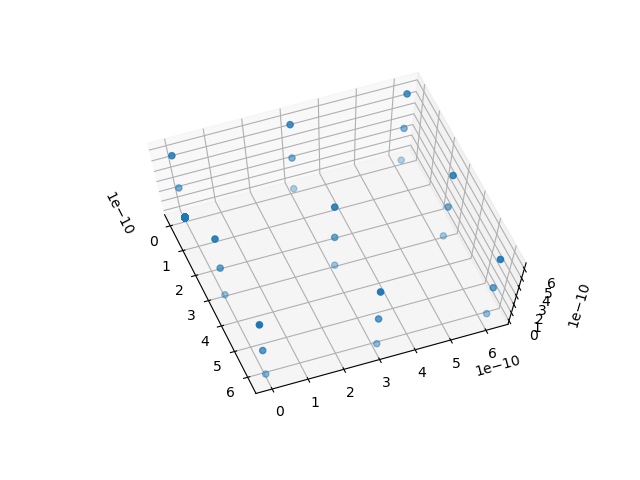

In [17]:
# 4)

Ncell = 3 # Number of cubes along each axis
Npart = Ncell**3

r = np.zeros((Nstep, Npart, 3))
v = np.zeros((Nstep, Npart, 3))
a = np.zeros((Nstep, Npart, 3))

L = 2**(1/6) * sigma * Ncell

part_no = 0
for i in range(Ncell):
    for j in range(Ncell):
        for k in range(Ncell):
            r[0,part_no,:] = (L/Ncell) * np.array([i, j, k])
            part_no += 1

# Same as Q1.c setup
    
fig = plt.figure()
ax = fig.add_subplot(111,projection='3d')

x_pos = r[:,:,0]
y_pos = r[:,:,1]
z_pos = r[:,:,2]

ax.scatter(x_pos, y_pos, z_pos)
plt.show()

In [18]:
vel = np.random.normal(size=(Npart, 3))
T = 300 # kelvin
C = np.sqrt((3*Npart*k_b*T)/(m*np.sum(vel*vel)))
v[0] = vel*C

E_P = np.zeros(Nstep)
Force = np.zeros((Nstep, Npart, 3))
E_K = np.zeros((Nstep, Npart))
Temp = np.zeros((Nstep, Npart))

E_P[0] = lennard_jones_energy(r[0,:,:], Npart, sigma, epsilon)
Force[0] = lennard_jones_force(r[0,:,:], Npart, sigma, epsilon)
a[0] = Force[0]/m

time = 0

for i in range(Nstep-1):
    
    E_P[i+1] = lennard_jones_energy(r[i+1,:,:], Npart, sigma, epsilon)
    Force[i+1] = lennard_jones_force(r[i+1,:,:], Npart, sigma, epsilon)
    
    time += dt
    
    for j in range(Npart):
    
        a[i+1,j,:] = Force[i+1,j]/m
    
        r_t_p_dt = r[i,j,:] + dt*v[i,j] + (dt**2)*(a[i,j]/2) 
        r[i+1,j,:] = r_t_p_dt
    
        v_t_p_dt = r[i,j,:] + dt*((a[i,j,:] + a[i+1,j,:])/2)
        v[i+1,j,:] = v_t_p_dt

C:\Program Files\Anaconda3\lib\site-packages\ipykernel_launcher.py:27: RuntimeWarning: divide by zero encountered in double_scalars
C:\Program Files\Anaconda3\lib\site-packages\ipykernel_launcher.py:27: RuntimeWarning: invalid value encountered in double_scalars
C:\Program Files\Anaconda3\lib\site-packages\ipykernel_launcher.py:29: RuntimeWarning: divide by zero encountered in double_scalars
C:\Program Files\Anaconda3\lib\site-packages\ipykernel_launcher.py:29: RuntimeWarning: invalid value encountered in double_scalars
